## Proyecto

### Observaciones
Hay 12 registros sin nombres de peleadores solo con 'v' y FIGHT_REFEREE Y FIGHT_DETAILS tienen un par de registros vacios/nulos

### Unidades de observación 
Las peleas de los diferentes eventos realizados por UFC desde 1994 hasta 2021

### Unidad de análisis
Análitica y descriptiva principalmente, aunque también se busca ver las posibilidades de una unidad predictiva (digamos para crear un modelo predictivo de resultados)
### Justificación de datos
Nuestros datos longitudinales ya que tienen "resultados repetitivos" a lo largo del tiempo  
También porque en varias ocasiones a los sujetos les aplican las mismas mediciones

### clasificación de variables/columnas

FIGHT_ID – Nominal  
EVENT_ID – Nominal  
FIGHT_NAME – Nominal  
FIGHT_WEIGHTCLASS – Nominal  
FIGHT_METHOD – Nominal  
ROUND – Ordinal  
TIME – Intervalo  
FIGHT_TIME_FORMAT – Nominal  
FIGHT_REFEREE – Nominal  
FIGHT_DETAILS – Nominal  
MINUTE - Razón  
SECOND - Razón  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Nominal  
FIGHT_WINNER – Nominal  

In [1]:
import numpy as np
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('ufc-fight-metadata.csv', encoding='utf-8')

In [3]:
df_backup = df.copy()
# df

In [4]:
# Lista de nombres de columnas
col = df.columns
# col

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721 entries, 0 to 6720
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIGHT_ID           6721 non-null   int64 
 1   EVENT_ID           6721 non-null   int64 
 2   FIGHT_NAME         6721 non-null   object
 3   FIGHT_WEIGHTCLASS  6721 non-null   object
 4   FIGHT_METHOD       6721 non-null   object
 5   ROUND              6721 non-null   int64 
 6   TIME               6721 non-null   object
 7   FIGHT_TIME_FORMAT  6721 non-null   object
 8   FIGHT_REFEREE      6689 non-null   object
 9   FIGHT_DETAILS      6705 non-null   object
 10  MINUTE             6721 non-null   int64 
 11  SECOND             6721 non-null   int64 
 12  FIGHT_STUB         6721 non-null   object
 13  EVENT_NAME         6721 non-null   object
 14  EVENT_DATE         6721 non-null   object
 15  EVENT_LOCATION     6721 non-null   object
 16  EVENT_STUB         6721 non-null   object


In [6]:
nominales = ['FIGHT_ID', 'EVENT_ID', 'FIGHT_NAME','FIGHT_WEIGHTCLASS','FIGHT_METHOD','FIGHT_TIME_FORMAT','FIGHT_REFEREE','FIGHT_DETAILS','FIGHT_STUB','EVENT_NAME','EVENT_DATE','EVENT_LOCATION','EVENT_STUB','DATE_YMD','URL','FIGHT_WINNER']
ordinales = ['ROUND']  # Pudiera considerarse a karno ordinal pues de un médico a otro el número asignado no es lo mismo
intervalo = ['TIME']
razon = ['MINUTE', 'SECOND']

In [7]:
for i in nominales:
    df[i] = df[i].astype('category')
    

In [8]:
for i in nominales + ordinales:
    print(i)
    df[i].unique()
    print()    

FIGHT_ID


[9532, 9533, 9534, 9535, 9536, ..., 16249, 16250, 16251, 16252, 16253]
Length: 6721
Categories (6721, int64): [9532, 9533, 9534, 9535, ..., 16250, 16251, 16252, 16253]


EVENT_ID


[1131, 1132, 1133, 1134, 1135, ..., 1740, 1742, 1743, 1744, 1745]
Length: 614
Categories (614, int64): [1131, 1132, 1133, 1134, ..., 1742, 1743, 1744, 1745]


FIGHT_NAME


['Derrick Lewis v Chris Daukaus', 'Stephen Thompson v Belal Muhammad', 'Amanda Lemos v Angela Hill', 'Raphael Assuncao v Ricky Simon', 'Diego Ferreira v Mateusz Gamrot', ..., 'Andrei Arlovski v Marcos Rogerio de Lima', 'Joseph Holmes v Junyong Park', 'Chase Hooper v Steve Garcia', 'Cody Durden v Carlos Mota', 'Christian Rodriguez v Joshua Weems']
Length: 6609
Categories (6609, object): [' v ', 'AJ Fletcher v Ange Loosa', 'Aalon Cruz v Spike Carlyle', 'Aaron Phillips v Matt Hobar', ..., 'Zhang Weili v Rose Namajunas', 'Zubaira Tukhugov v Ernest Chavez', 'Zubaira Tukhugov v Lerone Murphy', 'Zubaira Tukhugov v Phillipe Nover']


FIGHT_WEIGHTCLASS


['Heavyweight', 'Welterweight', 'Women&#039;s Strawweight', 'Bantamweight', 'Lightweight', ..., 'UFC 5 Tournament Title', 'UFC 4 Tournament Title', 'UFC 3 Tournament Title', 'UFC 2 Tournament Title', 'UFC Interim Flyweight Title']
Length: 109
Categories (109, object): ['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight', ..., 'Women&#039;s Bantamweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Strawweight']


FIGHT_METHOD


['KO/TKO', 'Decision - Unanimous', 'Decision - Split', 'Submission', 'Decision - Majority', 'Other', 'TKO - Doctor&#039;s Stoppage', 'Could Not Continue', 'DQ', 'Overturned']
Categories (10, object): ['Could Not Continue', 'DQ', 'Decision - Majority', 'Decision - Split', ..., 'Other', 'Overturned', 'Submission', 'TKO - Doctor&#039;s Stoppage']


FIGHT_TIME_FORMAT


['5 Rnd (5-5-5-5-5)', '3 Rnd (5-5-5)', '3 Rnd + OT (5-5-5-5)', '2 Rnd (5-5)', '1 Rnd + 2OT (15-3-3)', ..., '1 Rnd + OT (30-3)', '1 Rnd (20)', '1 Rnd (30)', '1 Rnd + OT (31-5)', 'No Time Limit']
Length: 19
Categories (19, object): ['1 Rnd (10)', '1 Rnd (12)', '1 Rnd (15)', '1 Rnd (18)', ..., '3 Rnd (5-5-5)', '3 Rnd + OT (5-5-5-5)', '5 Rnd (5-5-5-5-5)', 'No Time Limit']


FIGHT_REFEREE


['Mark Smith', 'Herb Dean', 'Jason Herzog', 'Chris Tognoni', 'Marc Goddard', ..., 'Joe Hamilton', 'Taimak Guarriello', 'Lonnie Foster', 'Tyler Tomlinson', 'Loic Pora']
Length: 209
Categories (208, object): ['Adam Cheadle', 'Adam Martinez', 'Al Coley', 'Al Guinee', ..., 'Wernei Cardoso', 'Will Fisher', 'Wolf Menninger', 'Yves Lavigne']


FIGHT_DETAILS


['Punches to Head In Clinch', 'Decision', 'Decision - Split', 'Punch to Head At Distance', 'Knee to Body On Ground', ..., 'Neck Crank Standing Back Control', 'Kick to Body From Bottom', 'to   At Distance       Knee injury', 'to   At Distance', 'Anaconda Choke From Side Control']
Length: 394
Categories (393, object): ['Accidental Eye Poke by O&#039;Malley', 'Accidental Headbutt', 'Anaconda Choke After Drop to Guard', 'Anaconda Choke After Drop to Half Guard', ..., 'to   At Distance       Knee injury', 'to   At Distance       Shoulder Injury', 'to   From Mount       Technical Submission', 'to   On Ground']


FIGHT_STUB


['derrick-lewis-v-chris-daukaus', 'stephen-thompson-v-belal-muhammad', 'amanda-lemos-v-angela-hill', 'raphael-assuncao-v-ricky-simon', 'diego-ferreira-v-mateusz-gamrot', ..., 'andrei-arlovski-v-marcos-rogerio-de-lima', 'joseph-holmes-v-junyong-park', 'chase-hooper-v-steve-garcia', 'cody-durden-v-carlos-mota', 'christian-rodriguez-v-joshua-weems']
Length: 6609
Categories (6609, object): ['-v-', 'aalon-cruz-v-spike-carlyle', 'aaron-phillips-v-matt-hobar', 'aaron-riley-v-joe-brammer', ..., 'zhang-weili-v-rose-namajunas', 'zubaira-tukhugov-v-ernest-chavez', 'zubaira-tukhugov-v-lerone-murphy', 'zubaira-tukhugov-v-phillipe-nover']


EVENT_NAME


['UFC Fight Night: Lewis vs. Daukaus', 'UFC 269: Oliveira vs. Poirier', 'UFC Fight Night: Font vs. Aldo', 'UFC Fight Night: Vieira vs. Tate', 'UFC Fight Night: Holloway vs. Rodriguez', ..., 'UFC Fight Night: Sandhagen vs. Song', 'UFC Fight Night: Dern vs. Yan', 'UFC Fight Night: Grasso vs. Araujo', 'UFC 280: Oliveira vs. Makhachev', 'UFC Fight Night: Kattar vs. Allen']
Length: 614
Categories (614, object): ['Ortiz vs Shamrock 3: The Final Chapter', 'The Ultimate Fighter: A Champion Will Be Crow..., 'The Ultimate Fighter: A New World Champion Fi..., 'The Ultimate Fighter: American Top Team vs. B..., ..., 'UFC on FX: Johnson vs McCall', 'UFC on FX: Maynard vs Guida', 'UFC on FX: Sotiropoulos vs Pearson', 'UFC: Silva vs Irvin']


EVENT_DATE


['December 18, 2021', 'December 11, 2021', 'December 04, 2021', 'November 20, 2021', 'November 13, 2021', ..., 'September 17, 2022', 'October 01, 2022', 'October 15, 2022', 'October 22, 2022', 'October 29, 2022']
Length: 609
Categories (609, object): ['April 01, 2009', 'April 02, 2004', 'April 02, 2008', 'April 04, 2015', ..., 'September 27, 2014', 'September 28, 2001', 'September 28, 2019', 'September 29, 2012']


EVENT_LOCATION


['Las Vegas, Nevada, USA', 'New York City, New York, USA', 'Abu Dhabi, Abu Dhabi, United Arab Emirates', 'Houston, Texas, USA', 'Glendale, Arizona, USA', ..., 'Dothan, Alabama, USA', 'San Juan, Puerto Rico', 'Casper, Wyoming, USA', 'Elmont, New York, USA', 'Paris, Ile-de-France, France']
Length: 168
Categories (168, object): ['Abu Dhabi, Abu Dhabi, United Arab Emirates', 'Abu Dhabi, United Arab Emirates', 'Adelaide, South Australia, Australia', 'Albany, New York, USA', ..., 'Wichita, Kansas, USA', 'Winnipeg, Manitoba, Canada', 'Yokohama, Kanagawa, Japan', 'Zagreb, Croatia']


EVENT_STUB


['ufc-fight-night-lewis-vs-daukaus', 'ufc-269-oliveira-vs-poirier', 'ufc-fight-night-font-vs-aldo', 'ufc-fight-night-vieira-vs-tate', 'ufc-fight-night-holloway-vs-rodriguez', ..., 'ufc-fight-night-sandhagen-vs-song', 'ufc-fight-night-dern-vs-yan', 'ufc-fight-night-grasso-vs-araujo', 'ufc-280-oliveira-vs-makhachev', 'ufc-fight-night-kattar-vs-allen']
Length: 614
Categories (614, object): ['ortiz-vs-shamrock-3-the-final-chapter', 'the-ultimate-fighter-a-champion-will-be-crown..., 'the-ultimate-fighter-a-new-world-champion-fin..., 'the-ultimate-fighter-american-top-team-vs-bla..., ..., 'ufc-on-fx-johnson-vs-mccall', 'ufc-on-fx-maynard-vs-guida', 'ufc-on-fx-sotiropoulos-vs-pearson', 'ufc-silva-vs-irvin']


DATE_YMD


['18/12/2021', '11/12/2021', '04/12/2021', '20/11/2021', '13/11/2021', ..., '17/09/2022', '01/10/2022', '15/10/2022', '22/10/2022', '29/10/2022']
Length: 609
Categories (609, object): ['01/01/2011', '01/02/2014', '01/03/2008', '01/03/2014', ..., '31/07/2021', '31/08/2013', '31/08/2019', '31/10/2020']


URL


['https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., ..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u...]
Length: 6721
Categories (6721, object): ['https://vegas-odds.com/ufc-fight-statistics/o..., 'https://vegas-odds.com/ufc-fight-statistics/o..., 'https://vegas-odds.com/ufc-fight-statistics/o..., 'https://vegas-odds.com/ufc-fight-statistics/o..., ..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u..., 'https://vegas-odds.com/ufc-fight-statistics/u...]


FIGHT_WINNER


['Derrick Lewis', 'Belal Muhammad', 'Amanda Lemos', 'Ricky Simon', 'Mateusz Gamrot', ..., 'Pete Rodriguez', 'Caio Borralho', 'Waldo Cortes-Acosta', 'Tresean Gore', 'Christian Rodriguez']
Length: 1588
Categories (1587, object): ['Aaron Riley', 'Aaron Rosa', 'Aaron Simpson', 'Abdul Razak Alhassan', ..., 'Zhang Lipeng', 'Zhang Tiequan', 'Zhang Weili', 'Zubaira Tukhugov']


ROUND


array([1, 3, 2, 5, 4], dtype=int64)

In [9]:
for i in nominales + ordinales:
    print(i)
    df[i].value_counts()
    print()

FIGHT_ID


FIGHT_ID
9532     1
13996    1
14020    1
14019    1
14018    1
        ..
11769    1
11768    1
11767    1
11766    1
16253    1
Name: count, Length: 6721, dtype: int64


EVENT_ID


EVENT_ID
1166    15
1195    15
1718    15
1223    14
1154    14
        ..
1726     6
1717     6
1678     6
1702     6
1691     6
Name: count, Length: 614, dtype: int64


FIGHT_NAME


FIGHT_NAME
 v                                     12
Dustin Poirier v Conor McGregor         3
Tito Ortiz v Ken Shamrock               3
Tyron Woodley v Stephen Thompson        2
Frankie Edgar v Gray Maynard            2
                                       ..
Gabriel Benitez v Charlie Ontiveros     1
Gabriel Benitez v Billy Quarantillo     1
Gabriel Benitez v Andre Fili            1
Gabe Green v Phil Rowe                  1
Zubaira Tukhugov v Phillipe Nover       1
Name: count, Length: 6609, dtype: int64


FIGHT_WEIGHTCLASS


FIGHT_WEIGHTCLASS
Lightweight                                           1138
Welterweight                                          1108
Middleweight                                           859
Featherweight                                          606
Heavyweight                                            578
                                                      ... 
Ultimate Fighter 15 Lightweight Tournament Title         1
Ultimate Fighter 14 Bantamweight Tournament Title        1
Ultimate Fighter 13 Welterweight Tournament Title        1
Ultimate Fighter 12 Lightweight Tournament Title         1
Ultimate Fighter 14 Featherweight Tournament Title       1
Name: count, Length: 109, dtype: int64


FIGHT_METHOD


FIGHT_METHOD
Decision - Unanimous            2355
KO/TKO                          2141
Submission                      1331
Decision - Split                 639
TKO - Doctor&#039;s Stoppage      86
Decision - Majority               80
Overturned                        47
Could Not Continue                20
DQ                                19
Other                              3
Name: count, dtype: int64


FIGHT_TIME_FORMAT


FIGHT_TIME_FORMAT
3 Rnd (5-5-5)           5908
5 Rnd (5-5-5-5-5)        582
1 Rnd + OT (12-3)         84
No Time Limit             30
3 Rnd + OT (5-5-5-5)      26
1 Rnd (20)                23
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               14
1 Rnd (15)                10
1 Rnd (10)                 7
1 Rnd (12)                 5
1 Rnd + OT (30-5)          3
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd + OT (27-3)          1
1 Rnd + OT (30-3)          1
1 Rnd + OT (31-5)          1
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: count, dtype: int64


FIGHT_REFEREE


FIGHT_REFEREE
Herb Dean               999
John McCarthy           650
Dan Miragliotta         420
Mario Yamasaki          392
Marc Goddard            391
                       ... 
Tom Jones                 1
Ivan Svec                 1
Steven Davis              1
Brandon Pfannenstiel      1
Gabe Barahona             1
Name: count, Length: 208, dtype: int64


FIGHT_DETAILS


FIGHT_DETAILS
Decision                                                  2435
Decision - Split                                           639
Punch to Head At Distance                                  560
Rear Naked Choke                                           486
Punches to Head At Distance                                273
                                                          ... 
Head Butt by Peralta                                         1
Head Butt                                                    1
Guillotine Choke From Mount       Technical Submission       1
Guillotine Choke From Bottom Side Control                    1
to   On Ground                                               1
Name: count, Length: 393, dtype: int64


FIGHT_STUB


FIGHT_STUB
-v-                                    12
dustin-poirier-v-conor-mcgregor         3
tito-ortiz-v-ken-shamrock               3
tyron-woodley-v-stephen-thompson        2
matt-serra-v-chris-lytle                2
                                       ..
gabriel-benitez-v-charlie-ontiveros     1
gabriel-benitez-v-billy-quarantillo     1
gabriel-benitez-v-andre-fili            1
gabe-green-v-phil-rowe                  1
zubaira-tukhugov-v-phillipe-nover       1
Name: count, Length: 6609, dtype: int64


EVENT_NAME


EVENT_NAME
UFC 259: Blachowicz vs. Adesanya       15
UFC 2: No Way Out                      15
UFC Fight Night: Whittaker vs. Till    15
UFC Fight Night: Smith vs. Spann       14
UFC 263: Adesanya vs. Vettori 2        14
                                       ..
UFC 274: Oliveira vs. Gaethje           6
UFC 25: Ultimate Japan 3                6
UFC 37.5: As Real As It Gets            6
UFC 3: The American Dream               6
UFC - Ultimate Japan                    6
Name: count, Length: 614, dtype: int64


EVENT_DATE


EVENT_DATE
November 19, 2016     25
October 04, 2014      23
May 31, 2014          22
August 23, 2014       21
June 28, 2014         21
                      ..
June 22, 2002          6
September 09, 1994     6
April 14, 2000         6
May 07, 2022           6
December 21, 1997      6
Name: count, Length: 609, dtype: int64


EVENT_LOCATION


EVENT_LOCATION
Las Vegas, Nevada, USA                        2054
Abu Dhabi, Abu Dhabi, United Arab Emirates     183
London, England, United Kingdom                128
Anaheim, California, USA                        95
Houston, Texas, USA                             94
                                              ... 
Bossier City, Louisiana, USA                     8
Dothan, Alabama, USA                             8
Miami, Florida, USA                              8
Chiba, Japan                                     7
Yokohama, Kanagawa, Japan                        6
Name: count, Length: 168, dtype: int64


EVENT_STUB


EVENT_STUB
ufc-fight-night-whittaker-vs-till     15
ufc-259-blachowicz-vs-adesanya        15
ufc-2-no-way-out                      15
ufc-fight-night-poirier-vs-gaethje    14
ufc-fight-night-marreta-vs-anders     14
                                      ..
ufc-274-oliveira-vs-gaethje            6
ufc-3-the-american-dream               6
ufc---ultimate-japan                   6
ufc-25-ultimate-japan-3                6
ufc-375-as-real-as-it-gets             6
Name: count, Length: 614, dtype: int64


DATE_YMD


DATE_YMD
19/11/2016    25
04/10/2014    23
31/05/2014    22
28/06/2014    21
23/08/2014    21
              ..
14/04/2000     6
21/12/1997     6
09/09/1994     6
07/05/2022     6
22/06/2002     6
Name: count, Length: 609, dtype: int64


URL


URL
https://vegas-odds.com/ufc-fight-statistics/ortiz-vs-shamrock-3-the-final-chapter-1642/jason-macdonald-v-ed-herman-15325/    1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holloway-vs-rodriguez-1135/cortney-casey-v-liana-jojua-9591/     1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holm-vs-correia-1319/dong-hyun-kim-v-colby-covington-11757/      1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holm-vs-correia-1319/cyril-asker-v-walt-harris-11760/            1
https://vegas-odds.com/ufc-fight-statistics/ufc-fight-night-holm-vs-correia-1319/andrei-arlovski-v-marcin-tybura-11756/      1
                                                                                                                            ..
https://vegas-odds.com/ufc-fight-statistics/ufc-258-usman-vs-burns-1169/maki-pitolo-v-julian-marquez-9988/                   1
https://vegas-odds.com/ufc-fight-statistics/ufc-258-usman-vs-burns-1169/kelvin-gastelum-v-ian-heinisch-9986


FIGHT_WINNER


FIGHT_WINNER
Jim Miller          23
Donald Cerrone      23
Charles Oliveira    22
Demian Maia         22
Jon Jones           21
                    ..
Mads Burnell         1
Darrell Horcher      1
Jarjis Danho         1
Jared Vanderaa       1
Josh Sampo           1
Name: count, Length: 1587, dtype: int64


ROUND


ROUND
3    3373
1    1953
2    1117
5     239
4      39
Name: count, dtype: int64

In [10]:
for i in nominales + ordinales:
    print(i)
    df[i].describe()
    print()

FIGHT_ID


count     6721
unique    6721
top       9532
freq         1
Name: FIGHT_ID, dtype: int64


EVENT_ID


count     6721
unique     614
top       1166
freq        15
Name: EVENT_ID, dtype: int64


FIGHT_NAME


count     6721
unique    6609
top         v 
freq        12
Name: FIGHT_NAME, dtype: object


FIGHT_WEIGHTCLASS


count            6721
unique            109
top       Lightweight
freq             1138
Name: FIGHT_WEIGHTCLASS, dtype: object


FIGHT_METHOD


count                     6721
unique                      10
top       Decision - Unanimous
freq                      2355
Name: FIGHT_METHOD, dtype: object


FIGHT_TIME_FORMAT


count              6721
unique               19
top       3 Rnd (5-5-5)
freq               5908
Name: FIGHT_TIME_FORMAT, dtype: object


FIGHT_REFEREE


count          6689
unique          208
top       Herb Dean
freq            999
Name: FIGHT_REFEREE, dtype: object


FIGHT_DETAILS


count         6705
unique         393
top       Decision
freq          2435
Name: FIGHT_DETAILS, dtype: object


FIGHT_STUB


count     6721
unique    6609
top        -v-
freq        12
Name: FIGHT_STUB, dtype: object


EVENT_NAME


count                                 6721
unique                                 614
top       UFC 259: Blachowicz vs. Adesanya
freq                                    15
Name: EVENT_NAME, dtype: object


EVENT_DATE


count                  6721
unique                  609
top       November 19, 2016
freq                     25
Name: EVENT_DATE, dtype: object


EVENT_LOCATION


count                       6721
unique                       168
top       Las Vegas, Nevada, USA
freq                        2054
Name: EVENT_LOCATION, dtype: object


EVENT_STUB


count                                  6721
unique                                  614
top       ufc-fight-night-whittaker-vs-till
freq                                     15
Name: EVENT_STUB, dtype: object


DATE_YMD


count           6721
unique           609
top       19/11/2016
freq              25
Name: DATE_YMD, dtype: object


URL


count                                                  6721
unique                                                 6721
top       https://vegas-odds.com/ufc-fight-statistics/or...
freq                                                      1
Name: URL, dtype: object


FIGHT_WINNER


count           6709
unique          1587
top       Jim Miller
freq              23
Name: FIGHT_WINNER, dtype: object


ROUND


count    6721.000000
mean        2.329564
std         1.013526
min         1.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: ROUND, dtype: float64

In [11]:
prop_cel = df.FIGHT_ID.value_counts(normalize=True)
prop_cel

FIGHT_ID
9532     0.000149
13996    0.000149
14020    0.000149
14019    0.000149
14018    0.000149
           ...   
11769    0.000149
11768    0.000149
11767    0.000149
11766    0.000149
16253    0.000149
Name: proportion, Length: 6721, dtype: float64

In [12]:
#Innecesaria estas contando los id que ya son unicos
freq = df.FIGHT_ID.value_counts()
freq.index, freq.values

(CategoricalIndex([ 9532, 13996, 14020, 14019, 14018, 14017, 14016, 14015,
                   14014, 14013,
                   ...
                   11774, 11773, 11772, 11771, 11770, 11769, 11768, 11767,
                   11766, 16253],
                  categories=[9532, 9533, 9534, 9535, ..., 16250, 16251, 16252, 16253], ordered=False, dtype='category', name='FIGHT_ID', length=6721),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

(array([  12.,    0., 3126.,    0.,   14.,    0.,   11.,    0.,   15.,
          18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Duración del round (minutos)')

Text(0, 0.5, 'Número de Peleas')

Text(0.5, 1.0, 'Minuto de finalización del round')

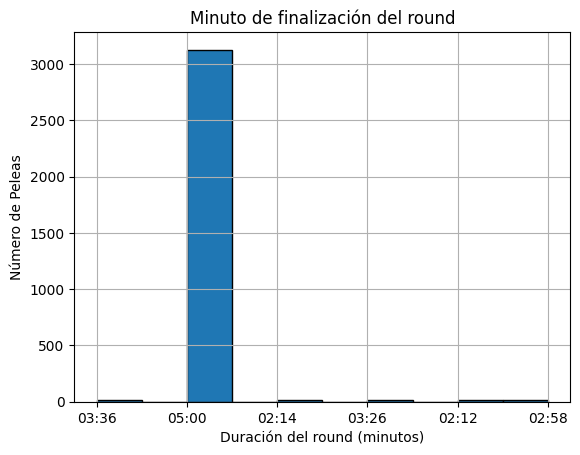

In [13]:
#Histograma de duracion de peleas solo que no se pq no sale en orden
plt.hist(df['TIME'], bins=10, range=(0, 5), edgecolor='k')
plt.xlabel('Duración del round (minutos)')
plt.ylabel('Número de Peleas')
plt.title('Minuto de finalización del round')
plt.grid(True)

# Mostrar el histograma
plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Herb Dean'),
  Text(1, 0, 'John McCarthy'),
  Text(2, 0, 'Dan Miragliotta'),
  Text(3, 0, 'Mario Yamasaki'),
  Text(4, 0, 'Marc Goddard'),
  Text(5, 0, 'Chris Tognoni'),
  Text(6, 0, 'Yves Lavigne'),
  Text(7, 0, 'Keith Peterson'),
  Text(8, 0, 'Jason Herzog'),
  Text(9, 0, 'Mark Smith')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Peleas arbitradas')

Text(0.5, 1.0, 'Arbitros con mas peleas')

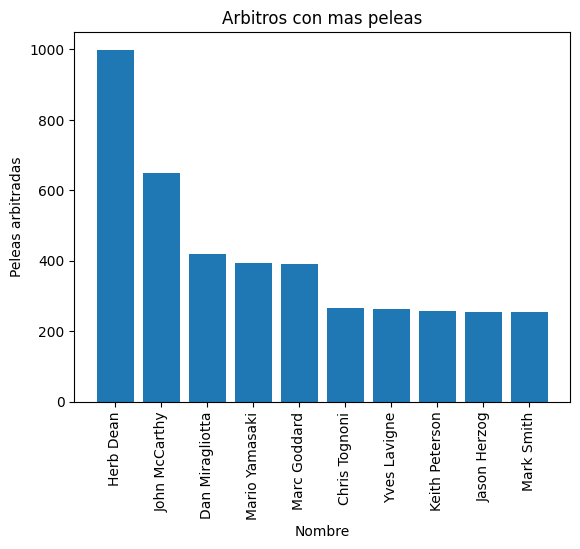

In [14]:
moda = df['FIGHT_REFEREE'].mode().iloc[0]
frecuencia = df['FIGHT_REFEREE'].value_counts()
top10Winners = frecuencia.head(10)

plt.bar(top10Winners.index, top10Winners.values)
plt.xticks(rotation=90)

plt.xlabel('Nombre')
plt.ylabel('Peleas arbitradas')
plt.title('Arbitros con mas peleas')

plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Decision'),
  Text(1, 0, 'Decision - Split'),
  Text(2, 0, 'Punch to Head At Distance'),
  Text(3, 0, 'Rear Naked Choke'),
  Text(4, 0, 'Punches to Head At Distance'),
  Text(5, 0, 'Punches to Head On Ground'),
  Text(6, 0, 'Punch to Head In Clinch'),
  Text(7, 0, 'Kick to Head At Distance'),
  Text(8, 0, 'Punches to Head From Mount'),
  Text(9, 0, 'Punches to Head From Back Control')])

Text(0.5, 0, 'Tipo de sumision')

Text(0, 0.5, 'Cantidad')

Text(0.5, 1.0, 'Sumisiones')

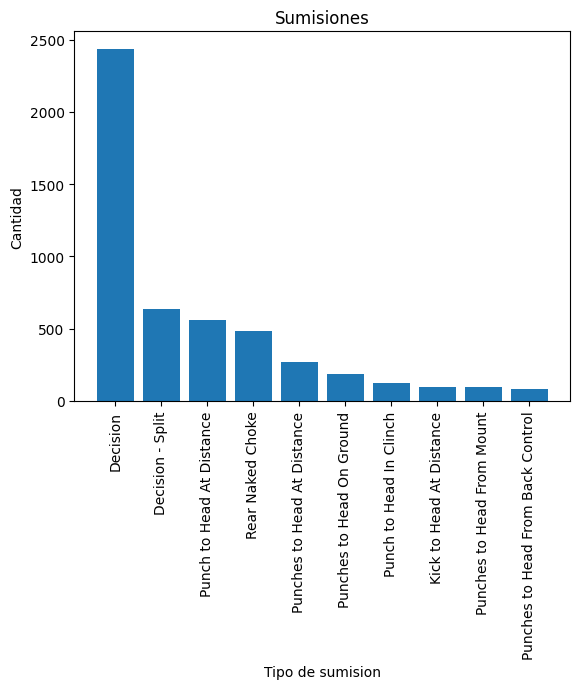

In [32]:
fightDetails = df['FIGHT_DETAILS'].value_counts()
topFightEndUp = fightDetails.head(10)
plt.bar(topFightEndUp.index, topFightEndUp.values)
plt.xticks(rotation=90)

plt.xlabel('Tipo de sumision')
plt.ylabel('Cantidad')
plt.title('Sumisiones')

plt.show()


<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jim Miller'),
  Text(1, 0, 'Donald Cerrone'),
  Text(2, 0, 'Charles Oliveira'),
  Text(3, 0, 'Demian Maia'),
  Text(4, 0, 'Jon Jones'),
  Text(5, 0, 'Andrei Arlovski'),
  Text(6, 0, 'Dustin Poirier'),
  Text(7, 0, 'Michael Bisping'),
  Text(8, 0, 'Rafael Dos Anjos'),
  Text(9, 0, 'Georges St-Pierre')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Peleadores con mas victorias')

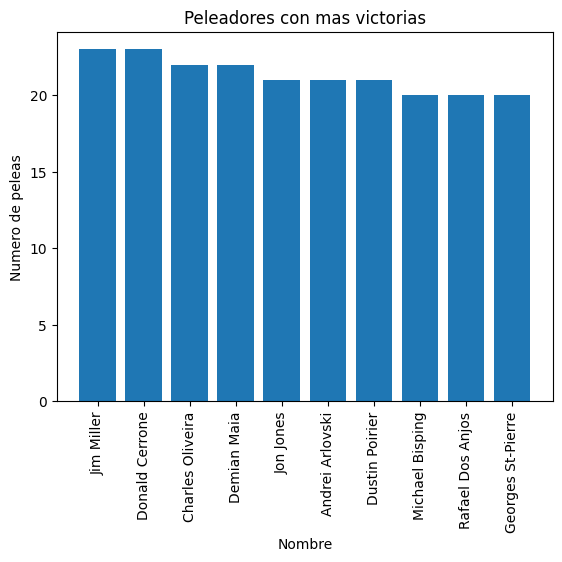

In [15]:
winnerFrequency = df['FIGHT_WINNER'].value_counts()


top_10_modas = winnerFrequency.head(10)

# Crear un gráfico de barras
plt.bar(top_10_modas.index, top_10_modas.values)
plt.xticks(rotation=90)
# Agregar etiquetas y título al gráfico
plt.xlabel('Nombre')
plt.ylabel('Numero de peleas')
plt.title('Peleadores con mas victorias')

# Mostrar el gráfico
plt.show()

<BarContainer object of 19 artists>

Text(0.5, 0, 'Formato de pelea')

Text(0, 0.5, 'Peleas con dicho formato')

Text(0.5, 1.0, 'Formato de peleas')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '3 Rnd (5-5-5)'),
  Text(1, 0, '5 Rnd (5-5-5-5-5)'),
  Text(2, 0, '1 Rnd + OT (12-3)'),
  Text(3, 0, 'No Time Limit'),
  Text(4, 0, '3 Rnd + OT (5-5-5-5)'),
  Text(5, 0, '1 Rnd (20)'),
  Text(6, 0, '1 Rnd + 2OT (15-3-3)'),
  Text(7, 0, '2 Rnd (5-5)'),
  Text(8, 0, '1 Rnd (15)'),
  Text(9, 0, '1 Rnd (10)'),
  Text(10, 0, '1 Rnd (12)'),
  Text(11, 0, '1 Rnd + OT (30-5)'),
  Text(12, 0, '1 Rnd (18)'),
  Text(13, 0, '1 Rnd + OT (15-3)'),
  Text(14, 0, '1 Rnd + OT (27-3)'),
  Text(15, 0, '1 Rnd + OT (30-3)'),
  Text(16, 0, '1 Rnd + OT (31-5)'),
  Text(17, 0, '1 Rnd + 2OT (24-3-3)'),
  Text(18, 0, '1 Rnd (30)')])

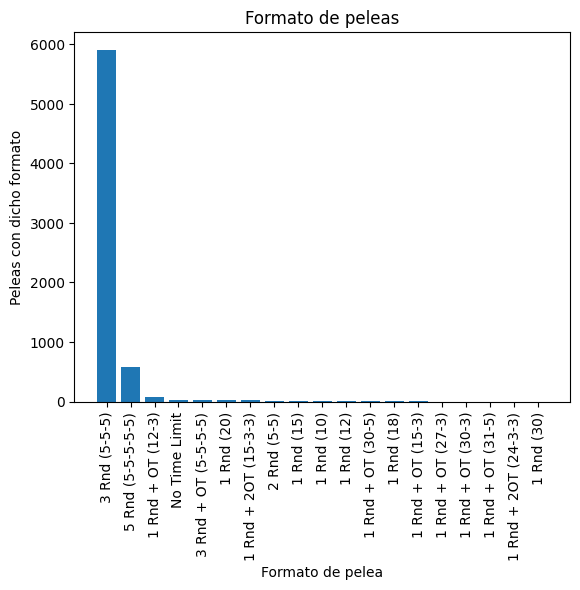

In [16]:
# Si sale en la grafica es que al menos aparece una vez en el dataset
fightFormat = df['FIGHT_TIME_FORMAT'].value_counts()

plt.bar(fightFormat.index, fightFormat.values)
plt.xlabel('Formato de pelea')
plt.ylabel('Peleas con dicho formato')
plt.title('Formato de peleas')
plt.xticks(rotation=90)

plt.show()

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x2369525d890>,
 [Text(1166, 0, '1166'),
  Text(1195, 0, '1195'),
  Text(1718, 0, '1718'),
  Text(1223, 0, '1223'),
  Text(1154, 0, '1154'),
  Text(1733, 0, '1733'),
  Text(1285, 0, '1285'),
  Text(1268, 0, '1268'),
  Text(1143, 0, '1143'),
  Text(1132, 0, '1132')])

Text(0.5, 0, 'Id de pelea')

Text(0, 0.5, 'Numero de peleas por evento')

Text(0.5, 1.0, 'Eventos con mas peleas')

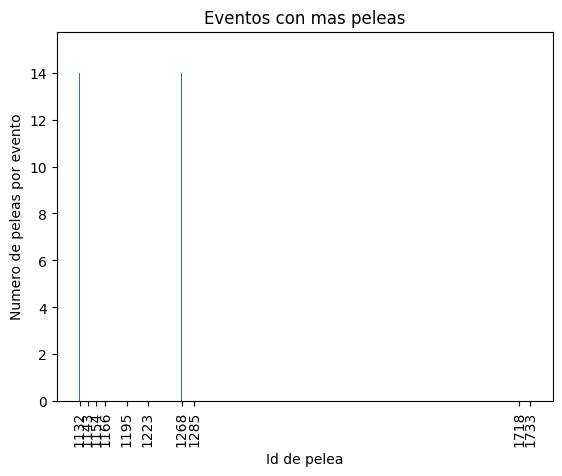

In [27]:
eventIdCount = df['EVENT_ID'].value_counts()

top10EventIdCount = eventIdCount.head(10)

plt.bar(top10EventIdCount.index, top10EventIdCount.values, width=0.4)

plt.xticks(top10EventIdCount.index, rotation=90)
plt.xlabel('Id de pelea')
plt.ylabel('Numero de peleas por evento')
plt.title('Eventos con mas peleas') 
plt.show()


### Histogramas

<Axes: xlabel='ROUND', ylabel='Count'>

[]

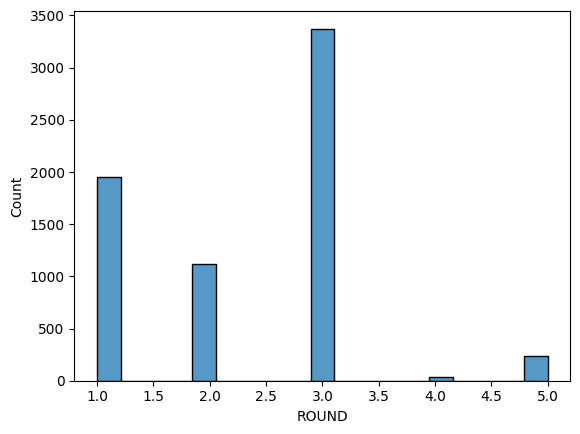

In [19]:
#Esta muy sesgada la informacion pq combina peleas de 3 y 5 rounds
#podriamos separar la informacion y hacer dos graficas 
sns.histplot(data=df, x='ROUND')
plt.plot()